In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from PIL import Image
import seaborn as sns


In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df=pd.read_csv('E:\\3rd sem proj\\fds ko project\\archive\\training_images\\training_images_digit.csv')

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,digit_0


In [5]:
#shuffling the data
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

In [7]:
X=df.drop('label',axis=1)
y=df['label']

In [8]:
pc=PCA(n_components=250)
pc.fit(X)
X_pc=pc.transform(X)

In [9]:
#making a dict for numbers and labels:
digit_dict={
    '०':0,
    '१': 1,
    '२':2,
    '३': 3,
    '४': 4,
    '५': 5,
    '६': 6,
    '७': 7,
    '८': 8,
    '९': 9
}

In [10]:
digit_dict = {v: k for k, v in digit_dict.items()}


In [14]:
X_train_no_pca,X_test_no_pca,y_train_no_pca,y_test_no_pca=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X_pc,y,test_size=0.2,random_state=42)

In [18]:
lr=LogisticRegression(multi_class='multinomial',max_iter=1000)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)


e:\conda\condaex\envs\classifier\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [19]:
lr_no_pc=LogisticRegression(multi_class='multinomial',max_iter=1000)
lr_no_pc.fit(X_train_no_pca,y_train_no_pca)
y_pred_no_pc=lr_no_pc.predict(X_test_no_pca)


e:\conda\condaex\envs\classifier\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [26]:
with_pc=accuracy_score(y_test,y_pred)*100
no_pc=accuracy_score(y_test_no_pca,y_pred_no_pc)*100

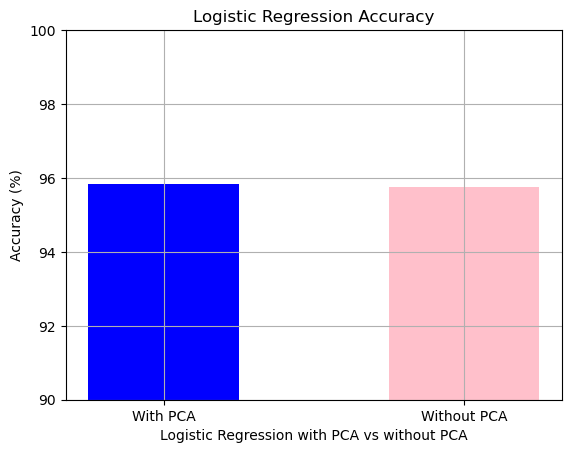

In [64]:
plt.bar([0,1],[with_pc,no_pc],tick_label=['With PCA','Without PCA'],color=['blue','pink'],width=0.5)
plt.title('Logistic Regression Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Logistic Regression with PCA vs without PCA')
plt.grid()
plt.ylim(90,100)
plt.show()

In [29]:
#using a knearest neighbours
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       394
           1       0.99      1.00      1.00       408
           2       0.95      0.99      0.97       403
           3       0.99      0.95      0.97       378
           4       0.99      1.00      1.00       402
           5       0.99      0.97      0.98       398
           6       1.00      0.98      0.99       378
           7       0.99      0.99      0.99       414
           8       0.99      1.00      1.00       420
           9       1.00      0.99      1.00       405

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

0.987


In [32]:
accuracy_score_knn=accuracy_score(y_test,y_pred_knn)*100
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       394
           1       0.98      0.99      0.98       408
           2       0.92      0.91      0.92       403
           3       0.93      0.90      0.91       378
           4       0.96      0.96      0.96       402
           5       0.96      0.96      0.96       398
           6       0.93      0.96      0.94       378
           7       0.96      0.97      0.96       414
           8       0.97      0.98      0.98       420
           9       0.98      0.97      0.98       405

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



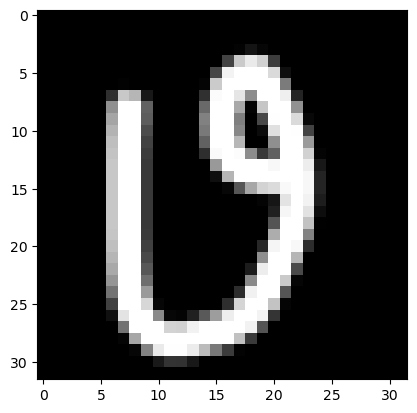

In [88]:
image=Image.open('E:\\3rd sem proj\\fds ko project\\archive\\testing_sample_images\\drawing (5).png')
image=image.convert('L')
image=image.resize((32,32))
plt.imshow(image,cmap='gray')
plt.show()

In [93]:
image=np.array(image)/255
image=image.flatten()
pca_image=pc.transform([image])

e:\conda\condaex\envs\classifier\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



In [92]:
digit_dict[knn.predict(pca_image)[0]]

'७'

In [96]:
y=y.astype(str)

In [116]:

fig=px.scatter_3d(x=X_pc[:4000,0],y=X_pc[:4000,1],z=X_pc[:4000,2],color=y[:4000],labels={'x':'PC1','y':'PC2','z':'PC3'},size=[0.5]*4000,
                  opacity=1,
                  size_max=12,
                  color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_layout(title='3D Scatter plot of first 3 principal components')
fig.update_layout(width=1920, height=1200,legend=dict(
    bordercolor='black',
    borderwidth=2,
    bgcolor='rgba(255,255,255,0.5)'
))  # Set custom width and height

fig.show()


In [76]:
import pickle
with open('E:\\3rd sem proj\\fds ko project\\archive\\models\\knn.pkl','wb') as f:
    pickle.dump(knn,f)

with open('E:\\3rd sem proj\\fds ko project\\archive\\models\\pca_250.pkl','wb') as f:
    pickle.dump(pc,f)

with open('E:\\3rd sem proj\\fds ko project\\archive\\models\\logistic_regression.pkl','wb') as f:
    pickle.dump(lr,f)
  

#Lets Train a Simple ANN model

In [33]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(1024,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(36,activation='softmax')
])


In [34]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20
                                            , restore_best_weights=False,
                                            verbose=1,
                                            mode='auto')

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
model_history=model.fit(X_train,y_train,epochs=100,batch_size=256
          ,callbacks=callback,validation_data=(X_test,y_test))

Epoch 1/100
63/63 [==============================] - 2s 24ms/step - loss: 0.0076 - accuracy: 0.9976 - val_loss: 0.0466 - val_accuracy: 0.9895
Epoch 2/100
63/63 [==============================] - 1s 22ms/step - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0360 - val_accuracy: 0.9912
Epoch 3/100
63/63 [==============================] - 1s 24ms/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.0383 - val_accuracy: 0.9915
Epoch 4/100
63/63 [==============================] - 1s 21ms/step - loss: 0.0063 - accuracy: 0.9976 - val_loss: 0.0444 - val_accuracy: 0.9908
Epoch 5/100
63/63 [==============================] - 1s 22ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0362 - val_accuracy: 0.9927
Epoch 6/100
63/63 [==============================] - 1s 23ms/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.0381 - val_accuracy: 0.9910
Epoch 7/100
63/63 [==============================] - 2s 27ms/step - loss: 0.0056 - accuracy: 0.9980 - val_loss: 0.0435 - val_accuracy: 0.9895
Epoch 

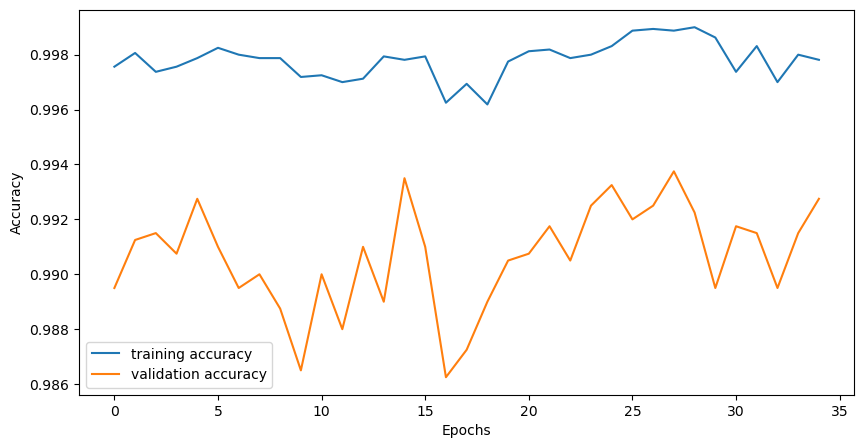

In [47]:
plt.figure(figsize=(10,5))
plt.plot(model_history.history['accuracy'],label='training accuracy',)
plt.plot(model_history.history['val_accuracy'],label='validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='best')

In [49]:
neural_network_acc=model_history.history['val_accuracy'][-1]*100

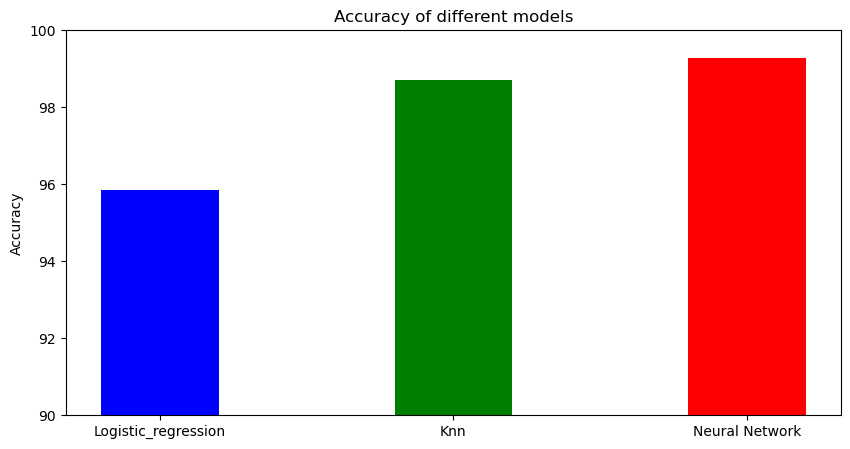

In [58]:
plt.figure(figsize=(10,5))
plt.bar([0,1,2],[with_pc,accuracy_score_knn,neural_network_acc],tick_label=['Logistic_regression','Knn','Neural Network'],color=['blue','green','red'],width=0.4)
plt.title('Accuracy of different models')
plt.ylabel('Accuracy')
plt.ylim(90,100)
plt.show()


In [113]:

model.save('E:\\3rd sem proj\\fds ko project\\archive\\models\\digits_model_no_pca.h5')

In [117]:
import plotly.io as pio

pio.write_html(fig, "E:\\3rd sem proj\\fds ko project\\archive\models\digits_viz.html")